In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
mensual = pd.read_csv('mensual.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

In [ ]:
diario = pd.read_csv('diario.csv')
semanal = pd.read_csv('semanal.csv')
mensual = pd.read_csv('mensual.csv')

In [ ]:
diario['pickup_datetime'] = pd.to_datetime(diario['pickup_datetime'])
semanal['pickup_datetime'] = pd.to_datetime(semanal['pickup_datetime'])
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])

In [ ]:
diario.set_index('pickup_datetime', inplace=True)
mensual.set_index('pickup_datetime', inplace=True)
semanal.set_index('pickup_datetime', inplace=True)

In [ ]:
diario.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-05,107088,152369.55,1746995.00,1.040973e+06,84509.0
2023-09-06,125811,179210.26,2181041.47,1.381579e+06,100073.0
2023-09-07,139797,199385.39,2453146.14,1.579063e+06,110657.0
2023-09-08,136767,187498.75,2299946.76,1.473957e+06,104886.0
2023-09-09,140098,190146.87,2148279.09,1.380598e+06,100666.0


In [ ]:
semanal.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-17,860067,1215057.15,14395656.38,9.061134e+06,665479.0
2023-09-24,379317,536201.11,6733854.78,4.294240e+06,586816.0
2023-10-01,840174,1177465.37,13800304.01,8.531493e+06,647820.0
2023-10-08,871700,1223806.22,14176927.80,8.775225e+06,664636.0
2023-10-15,865999,1207735.18,14104448.20,8.814019e+06,659893.0


In [3]:
mensual.head()

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-30,2732993,3840800.70,45795129.41,2.875794e+07,2403633.0
2023-10-31,3898868,5472308.86,63778214.48,3.970597e+07,2978961.0
2023-11-30,3726416,5136505.72,60388236.66,3.754072e+07,2841540.0
2023-12-31,3890520,5266948.52,61323166.56,3.819132e+07,2936035.0
2024-01-31,3310266,4670785.61,51801929.35,3.013794e+07,2567477.0


## Preparacion

In [ ]:
mensual['fecha_numeros']=mensual.index.map(datetime.datetime.toordinal)
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)

### Verificacion de estacionariedad

In [ ]:
#H0: No es estacionaria
#H1: Es estacionaria
def adfuller_test(trips):
    result = adfuller(trips)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('Es estacionaria.')
    else:
        print('No es estacionaria.')

In [ ]:
adfuller_test(diario.n_trips)

ADF Test Statistic : -3.139692525320361
p-value : 0.023751837758042283
#Lags Used : 15
Number of Observations Used : 346
Es estacionaria.


In [ ]:
adfuller_test(semanal.n_trips)

ADF Test Statistic : -3.1430268483560035
p-value : 0.02352857488261235
#Lags Used : 0
Number of Observations Used : 46
Es estacionaria.


In [ ]:
adfuller_test(mensual.n_trips)

ADF Test Statistic : -1.5230804889011658
p-value : 0.522064429840885
#Lags Used : 3
Number of Observations Used : 8
No es estacionaria.


### Regresion Lineal

In [ ]:
reg_lineal_d = LinearRegression() #Instanciamos el modelo

reg_lineal_d.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.n_trips) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura)

LinearRegression()

In [ ]:
reg_lineal_s = LinearRegression() #Instanciamos el modelo

reg_lineal_s.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.n_trips) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura)

LinearRegression()

In [ ]:
reg_lineal_m = LinearRegression() #Instanciamos el modelo

reg_lineal_m.fit(mensual.fecha_numeros.values.reshape(-1, 1), mensual.n_trips) # Entrenamos el modelo con los datos de entrenamiento (fecha y temperatura)

LinearRegression()

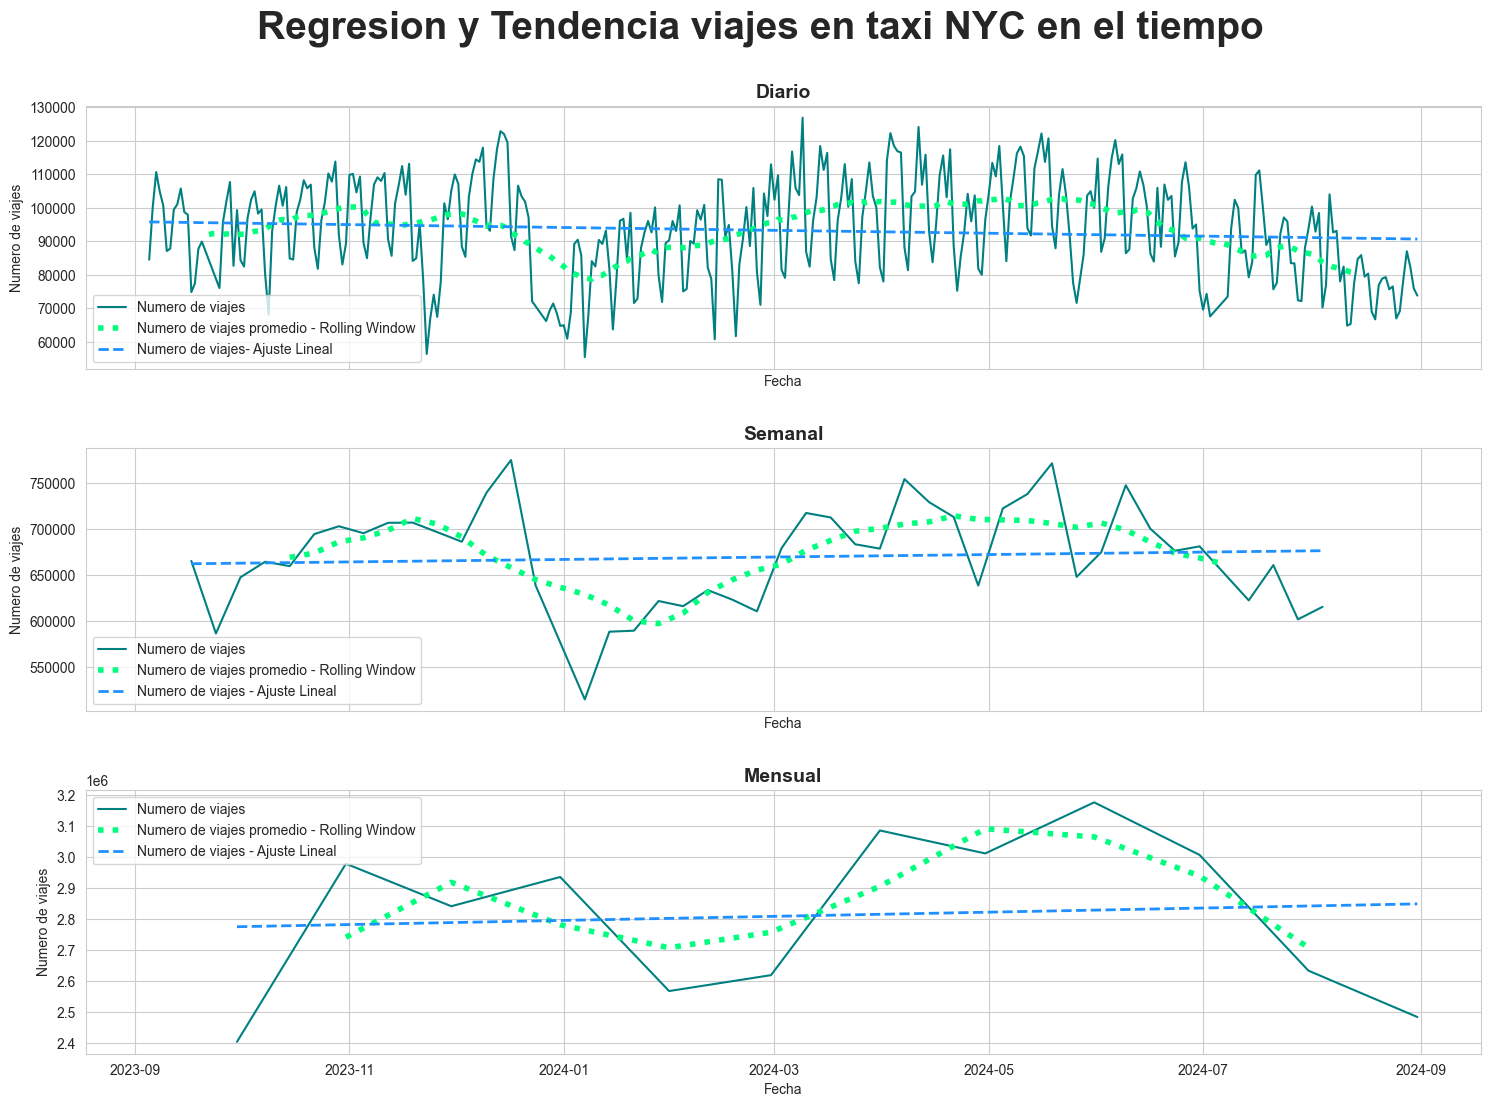

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,1, figsize = (18,12), gridspec_kw={'height_ratios': [1, 1,1]}, sharex=True)
fig.suptitle("Regresion y Tendencia viajes en taxi NYC en el tiempo",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.3)

ventana = (35)
diario_promedio_tendencia = diario.n_trips.rolling(window=ventana, center = True).mean()
ax[0].plot(diario.index, diario.n_trips, label = 'Numero de viajes', color='teal')
ax[0].plot(diario_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[0].plot(diario.index, reg_lineal_d.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 2, linestyle="--", label = 'Numero de viajes- Ajuste Lineal', color='dodgerblue')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Numero de viajes')
ax[0].set_title('Diario',fontsize=14, fontweight='bold')
ax[0].legend()

ventana = (9)
semanal_promedio_tendencia = semanal.n_trips.rolling(window=ventana, center = True).mean()
ax[1].plot(semanal.index, semanal.n_trips, label = 'Numero de viajes', color='teal')
ax[1].plot(semanal_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[1].plot(semanal.index, reg_lineal_s.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 2, linestyle="--", label = 'Numero de viajes - Ajuste Lineal', color='dodgerblue')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Numero de viajes')
ax[1].set_title('Semanal',fontsize=14, fontweight='bold')
ax[1].legend()

ventana = (3)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
ax[2].plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
ax[2].plot(mensual_promedio_tendencia, lw = 4, linestyle=":", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
ax[2].plot(mensual.index, reg_lineal_m.predict(mensual.fecha_numeros.values.reshape(-1, 1)), lw = 2, linestyle="--", label = 'Numero de viajes - Ajuste Lineal', color='dodgerblue')
ax[2].set_xlabel('Fecha')
ax[2].set_ylabel('Numero de viajes')
ax[2].set_title('Mensual',fontsize=14, fontweight='bold')
ax[2].legend()

plt.show()

## Frecuencia Mensual

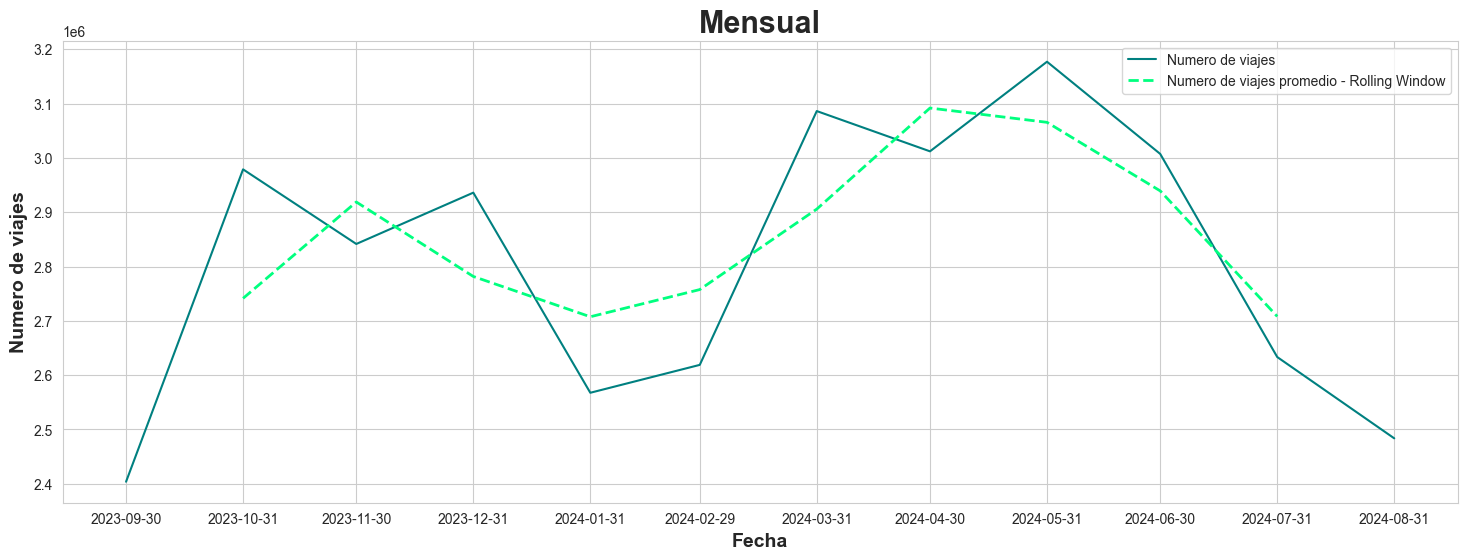

In [ ]:
plt.figure(figsize=(18,6))

ventana = (3)
mensual_promedio_tendencia = mensual.n_trips.rolling(window=ventana, center = True).mean()
plt.plot(mensual.index, mensual.n_trips, label = 'Numero de viajes', color='teal')
plt.plot(mensual_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
plt.xlabel('Fecha',fontsize=14, fontweight='bold')
plt.ylabel('Numero de viajes',fontsize=14, fontweight='bold')
plt.xticks(ticks=mensual.index)
plt.title('Mensual',fontsize=22, fontweight='bold')
plt.legend()

In [ ]:
mensual['month_diff'] = mensual['n_trips'] - mensual['n_trips'].shift(1)
mensual['month_diff']

pickup_datetime
2023-09-30         NaN
2023-10-31    575328.0
2023-11-30   -137421.0
2023-12-31     94495.0
2024-01-31   -368558.0
2024-02-29     51346.0
2024-03-31    467484.0
2024-04-30    -74159.0
2024-05-31    165049.5
2024-06-30   -169833.5
2024-07-31   -374070.0
2024-08-31   -149752.0
Name: month_diff, dtype: float64

In [ ]:
adfuller_test(mensual['month_diff'].dropna())

ADF Test Statistic : -3.804512348014463
p-value : 0.002861483714821871
#Lags Used : 0
Number of Observations Used : 10
Es estacionaria.


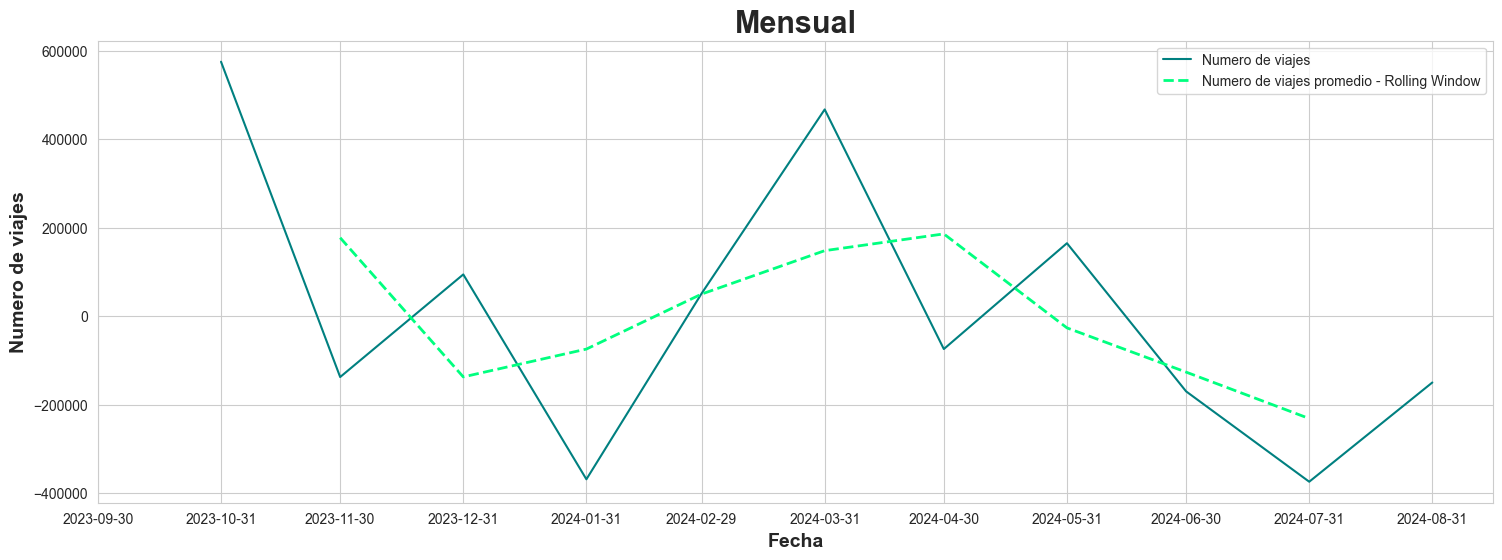

In [ ]:
plt.figure(figsize=(18,6))

ventana = (3)
mensual_promedio_tendencia = mensual['month_diff'].rolling(window=ventana, center = True).mean()
plt.plot(mensual.index, mensual['month_diff'], label = 'Numero de viajes', color='teal')
plt.plot(mensual_promedio_tendencia, lw = 2, linestyle="--", label = 'Numero de viajes promedio - Rolling Window', color='springgreen')
plt.xlabel('Fecha',fontsize=14, fontweight='bold')
plt.ylabel('Numero de viajes',fontsize=14, fontweight='bold')
plt.xticks(ticks=mensual.index)
plt.title('Mensual',fontsize=22, fontweight='bold')
plt.legend()

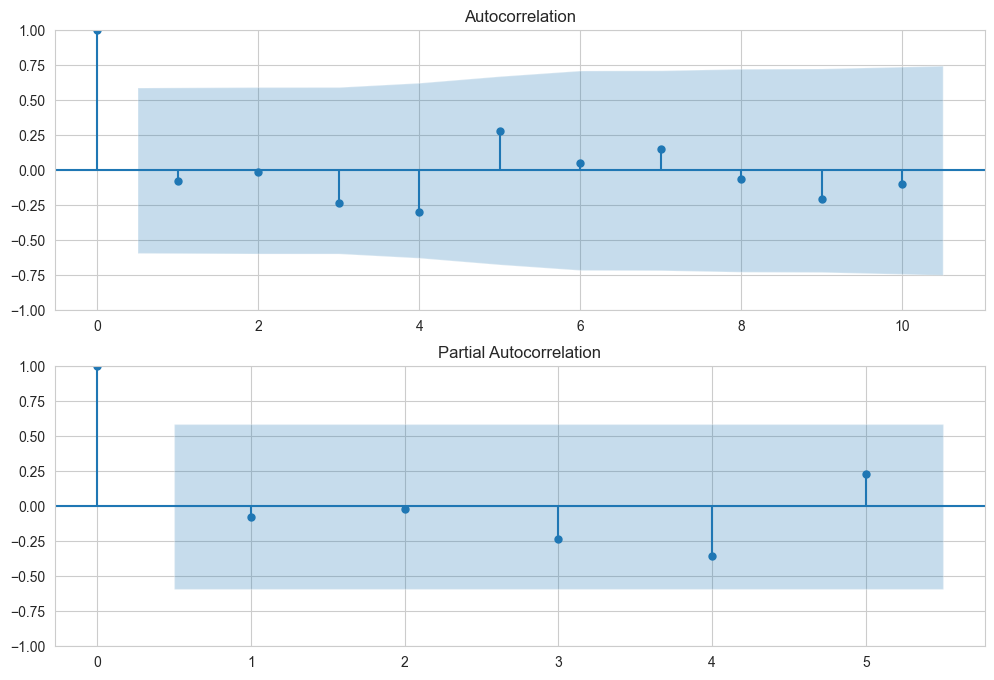

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mensual['month_diff'].iloc[1:], lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mensual['month_diff'].iloc[1:], lags=5, ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

## ARIMA

- p: orden del modelo AR (autoregresivo)
- d: orden de integración (número de diferencias no estacionales)
- q: orden del modelo MA (media móvil)

In [ ]:
model = ARIMA(mensual['month_diff'],order=(2,1,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             month_diff   No. Observations:                   12
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -155.097
Date:                Tue, 12 Nov 2024   AIC                            318.193
Time:                        23:52:39   BIC                            319.785
Sample:                    09-30-2023   HQIC                           317.190
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3098      0.270     -4.846      0.000      -1.840      -0.780
ar.L2         -0.6906      0.306     -2.259      0.024      -1.290      -0.091
ma.L1          0.9624      0.858      1.121      0.262      -0.720       2.645
sigma2      8.554e+10   1.04e-11   8.22e+21      0.000    8.55e+10    8.55e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.88   Prob(JB):                         0.68
Heteroskedasticity (H):               0.29   Skew:                             0.35
Prob(H) (two-sided):                  0.26   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.53e+37. Standard errors may be unstable.
"""

In [ ]:
last_date = mensual.index[-1]
forecast=model_fit.predict(start = last_date, end = last_date + pd.DateOffset(months=12), dynamic = True)

In [ ]:
forecast_df = pd.DataFrame({'month_diff': forecast}, index=pd.date_range(start=last_date, periods=13, freq='M')[1:])
forecast_df

,month_diff
2024-09-30,-311991.077771
2024-10-31,-235471.234515
2024-11-30,-202549.221288
2024-12-31,-298512.378505
2025-01-31,-195555.932556
2025-02-28,-264137.790183
2025-03-31,-245408.711885
2025-04-30,-222579.270578
2025-05-31,-265414.736975
2025-06-30,-225074.679347


In [ ]:
forecast_df

,month_diff
2024-09-30,-311991.077771
2024-10-31,-235471.234515
2024-11-30,-202549.221288
2024-12-31,-298512.378505
2025-01-31,-195555.932556
2025-02-28,-264137.790183
2025-03-31,-245408.711885
2025-04-30,-222579.270578
2025-05-31,-265414.736975
2025-06-30,-225074.679347


In [ ]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros,month_diff
pickup_datetime,,,,,,,
2023-09-30,2732993,3840800.70,45795129.41,2.875794e+07,2403633.0,738793,NaN
2023-10-31,3898868,5472308.86,63778214.48,3.970597e+07,2978961.0,738824,575328.0
2023-11-30,3726416,5136505.72,60388236.66,3.754072e+07,2841540.0,738854,-137421.0
2023-12-31,3890520,5266948.52,61323166.56,3.819132e+07,2936035.0,738885,94495.0
2024-01-31,3310266,4670785.61,51801929.35,3.013794e+07,2567477.0,738916,-368558.0
2024-02-29,3341622,4790656.33,53447385.19,3.177544e+07,2618823.0,738945,51346.0
2024-03-31,3916080,5804068.48,63395507.19,3.847457e+07,3086307.0,738976,467484.0
2024-04-30,3809875,5778995.02,62516945.41,3.832527e+07,3012148.0,739006,-74159.0
2024-05-31,3988977,5993937.36,66836199.45,4.142039e+07,3177197.5,739037,165049.5


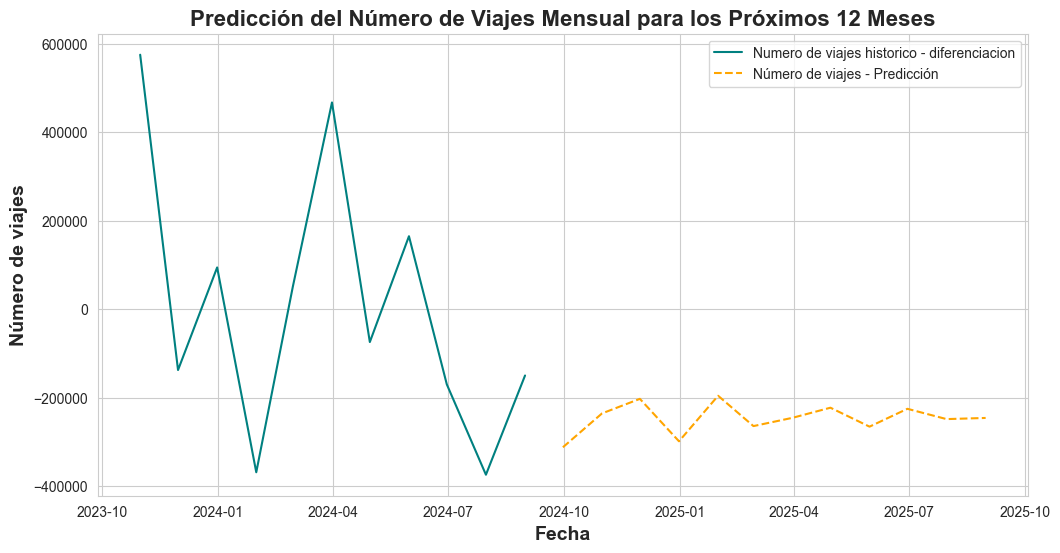

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(mensual.index, mensual['month_diff'], label='Numero de viajes historico - diferenciacion', color='teal')
plt.plot(forecast_df.index,forecast_df['month_diff'] , label='Número de viajes - Predicción', color='orange', linestyle='--')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Número de viajes', fontsize=14, fontweight='bold')
plt.title('Predicción del Número de Viajes Mensual para los Próximos 12 Meses', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

In [ ]:
# 'differenced_series' es la serie de valores diferenciados
# 'original_series' es la serie original antes de diferenciar

# Valor inicial de la serie (puede ser el primer valor de original_series)
initial_value = mensual['n_trips'].iloc[0]

# Integrar la serie diferenciada usando cumsum
restored_series = mensual['month_diff'].cumsum() + initial_value

# Si estás trabajando con una columna específica de un DataFrame:
mensual['restored_series'] = mensual['month_diff'].cumsum() + mensual['n_trips'].shift(1).fillna(method='bfill')


In [ ]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros,month_diff,restored_series
pickup_datetime,,,,,,,,
2023-09-30,2732993,3840800.70,45795129.41,2.875794e+07,2403633.0,738793,NaN,NaN
2023-10-31,3898868,5472308.86,63778214.48,3.970597e+07,2978961.0,738824,575328.0,2978961.0
2023-11-30,3726416,5136505.72,60388236.66,3.754072e+07,2841540.0,738854,-137421.0,3416868.0
2023-12-31,3890520,5266948.52,61323166.56,3.819132e+07,2936035.0,738885,94495.0,3373942.0
2024-01-31,3310266,4670785.61,51801929.35,3.013794e+07,2567477.0,738916,-368558.0,3099879.0
2024-02-29,3341622,4790656.33,53447385.19,3.177544e+07,2618823.0,738945,51346.0,2782667.0
2024-03-31,3916080,5804068.48,63395507.19,3.847457e+07,3086307.0,738976,467484.0,3301497.0
2024-04-30,3809875,5778995.02,62516945.41,3.832527e+07,3012148.0,739006,-74159.0,3694822.0
2024-05-31,3988977,5993937.36,66836199.45,4.142039e+07,3177197.5,739037,165049.5,3785712.5


In [ ]:
restored_series = mensual['month_diff'].copy()

restored_series.iloc[0] = mensual['n_trips'].iloc[0]

for i in range(1, len(restored_series)):
    restored_series.iloc[i] = restored_series.iloc[i] + restored_series.iloc[i - 1]

mensual['restored_series'] = restored_series


In [ ]:
restored_series = forecast_df['month_diff'].copy()

restored_series.iloc[0] = mensual['n_trips'].iloc[-1]

for i in range(1, len(restored_series)):
    restored_series.iloc[i] = restored_series.iloc[i] + restored_series.iloc[i - 1]

forecast_df['n_trips'] = restored_series

In [ ]:
forecast_df

,month_diff,restored_series,n_trips
2024-09-30,-311991.077771,2.483542e+06,2.483542e+06
2024-10-31,-235471.234515,2.248071e+06,2.248071e+06
2024-11-30,-202549.221288,2.045522e+06,2.045522e+06
2024-12-31,-298512.378505,1.747009e+06,1.747009e+06
2025-01-31,-195555.932556,1.551453e+06,1.551453e+06
2025-02-28,-264137.790183,1.287315e+06,1.287315e+06
2025-03-31,-245408.711885,1.041907e+06,1.041907e+06
2025-04-30,-222579.270578,8.193275e+05,8.193275e+05
2025-05-31,-265414.736975,5.539127e+05,5.539127e+05
2025-06-30,-225074.679347,3.288380e+05,3.288380e+05


In [ ]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros,month_diff,restored_series
pickup_datetime,,,,,,,,
2023-09-30,2732993,3840800.70,45795129.41,2.875794e+07,2403633.0,738793,NaN,2403633.0
2023-10-31,3898868,5472308.86,63778214.48,3.970597e+07,2978961.0,738824,575328.0,2978961.0
2023-11-30,3726416,5136505.72,60388236.66,3.754072e+07,2841540.0,738854,-137421.0,2841540.0
2023-12-31,3890520,5266948.52,61323166.56,3.819132e+07,2936035.0,738885,94495.0,2936035.0
2024-01-31,3310266,4670785.61,51801929.35,3.013794e+07,2567477.0,738916,-368558.0,2567477.0
2024-02-29,3341622,4790656.33,53447385.19,3.177544e+07,2618823.0,738945,51346.0,2618823.0
2024-03-31,3916080,5804068.48,63395507.19,3.847457e+07,3086307.0,738976,467484.0,3086307.0
2024-04-30,3809875,5778995.02,62516945.41,3.832527e+07,3012148.0,739006,-74159.0,3012148.0
2024-05-31,3988977,5993937.36,66836199.45,4.142039e+07,3177197.5,739037,165049.5,3177197.5


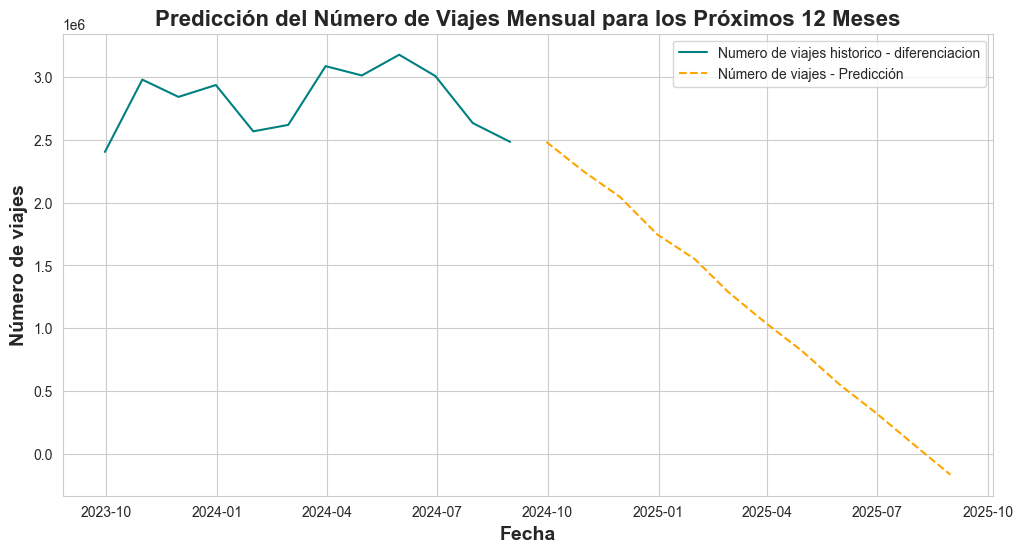

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(mensual.index, mensual['n_trips'], label='Numero de viajes historico - diferenciacion', color='teal')
plt.plot(forecast_df.index,forecast_df['n_trips'] , label='Número de viajes - Predicción', color='orange', linestyle='--')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Número de viajes', fontsize=14, fontweight='bold')
plt.title('Predicción del Número de Viajes Mensual para los Próximos 12 Meses', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## SARIMA

In [ ]:
# Parámetros para SARIMA: p, d, q, P, D, Q, m
p, d, q = 2, 1, 1  # Componentes no estacionales
P, D, Q, m = 1, 1, 1, 12  # Componentes estacionales, con m=12 para indicar una estacionalidad de 12 meses

# Definir el modelo SARIMA
sarima_model = SARIMAX(mensual['month_diff'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Ajustar el modelo SARIMA
sarima_fit = sarima_model.fit(disp=False)

# Generar pronóstico para los próximos 12 meses
last_date = mensual.index[-1]
forecast_steps = 12
sarima_forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Crear DataFrame de predicción con el índice de fechas
forecast_df = sarima_forecast.summary_frame()
forecast_df.index = forecast_index


In [ ]:
forecast_df

month_diff,mean,mean_se,mean_ci_lower,mean_ci_upper
2024-09-30,80379.153974,1483.240088,77472.056820,83286.251128
2024-10-31,310510.423013,1673.320663,307230.774780,313790.071246
2024-11-30,-402238.576987,1673.320961,-405518.225806,-398958.928168
2024-12-31,-170322.576987,1673.321260,-173602.226392,-167042.927582
2025-01-31,-633375.576987,1673.321559,-636655.226977,-630095.926997
2025-02-28,-213471.576987,1673.321858,-216751.227563,-210191.926411
2025-03-31,202666.423013,1673.322157,199386.771852,205946.074175
2025-04-30,-338976.576987,1673.322455,-342256.228734,-335696.925240
2025-05-31,-99768.076987,1673.322754,-103047.729320,-96488.424654
2025-06-30,-434651.076987,1673.323053,-437930.729905,-431371.424068


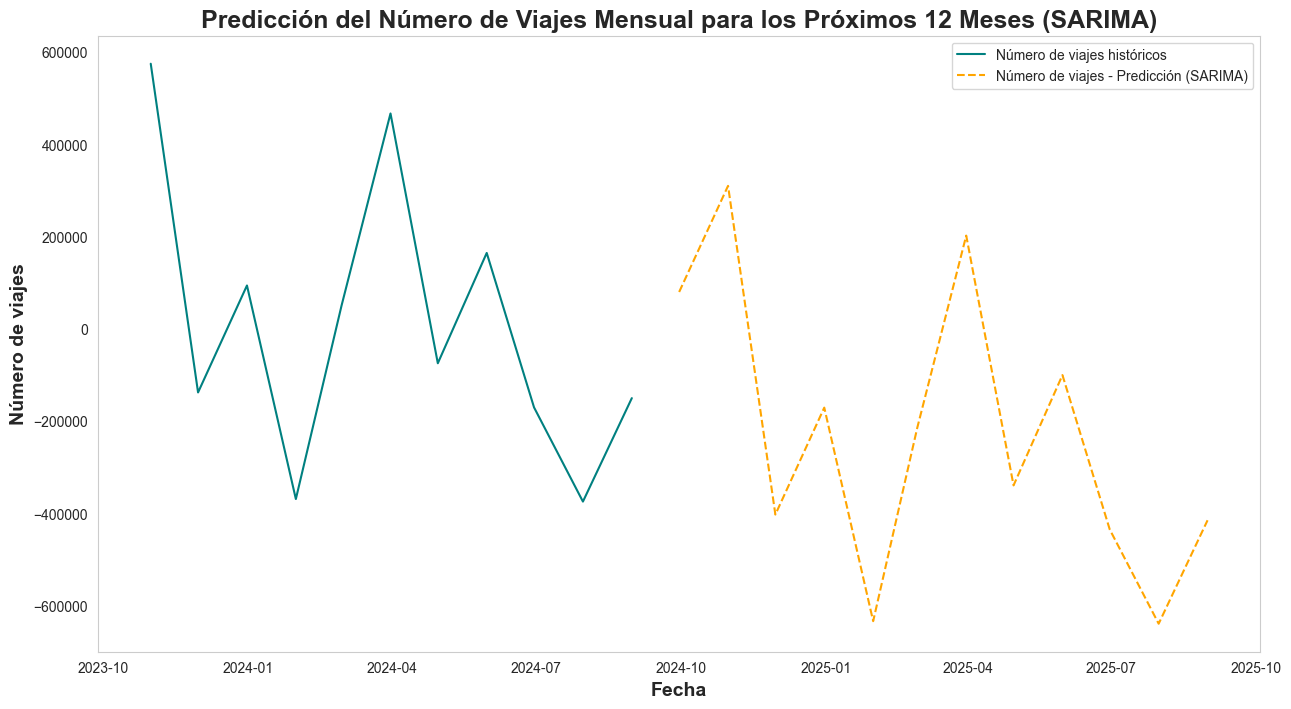

In [ ]:
# Graficar resultados
plt.figure(figsize=(15, 8))
plt.plot(mensual.index, mensual['month_diff'], label='Número de viajes históricos', color='teal')
plt.plot(forecast_df.index, forecast_df['mean'], label='Número de viajes - Predicción (SARIMA)', color='orange', linestyle='--')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Número de viajes', fontsize=14, fontweight='bold')
plt.title('Predicción del Número de Viajes Mensual para los Próximos 12 Meses (SARIMA)', fontsize=18, fontweight='bold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
restored_series = forecast_df['mean'].copy()

restored_series.iloc[0] = mensual['n_trips'].iloc[-1]

for i in range(1, len(restored_series)):
    restored_series.iloc[i] = restored_series.iloc[i] + restored_series.iloc[i - 1]

forecast_df['n_trips'] = restored_series

In [ ]:
forecast_df

month_diff,mean,mean_se,mean_ci_lower,mean_ci_upper,n_trips
2024-09-30,80379.153974,1483.240088,77472.056820,83286.251128,2.483542e+06
2024-10-31,310510.423013,1673.320663,307230.774780,313790.071246,2.794052e+06
2024-11-30,-402238.576987,1673.320961,-405518.225806,-398958.928168,2.391814e+06
2024-12-31,-170322.576987,1673.321260,-173602.226392,-167042.927582,2.221491e+06
2025-01-31,-633375.576987,1673.321559,-636655.226977,-630095.926997,1.588116e+06
2025-02-28,-213471.576987,1673.321858,-216751.227563,-210191.926411,1.374644e+06
2025-03-31,202666.423013,1673.322157,199386.771852,205946.074175,1.577311e+06
2025-04-30,-338976.576987,1673.322455,-342256.228734,-335696.925240,1.238334e+06
2025-05-31,-99768.076987,1673.322754,-103047.729320,-96488.424654,1.138566e+06
2025-06-30,-434651.076987,1673.323053,-437930.729905,-431371.424068,7.039148e+05


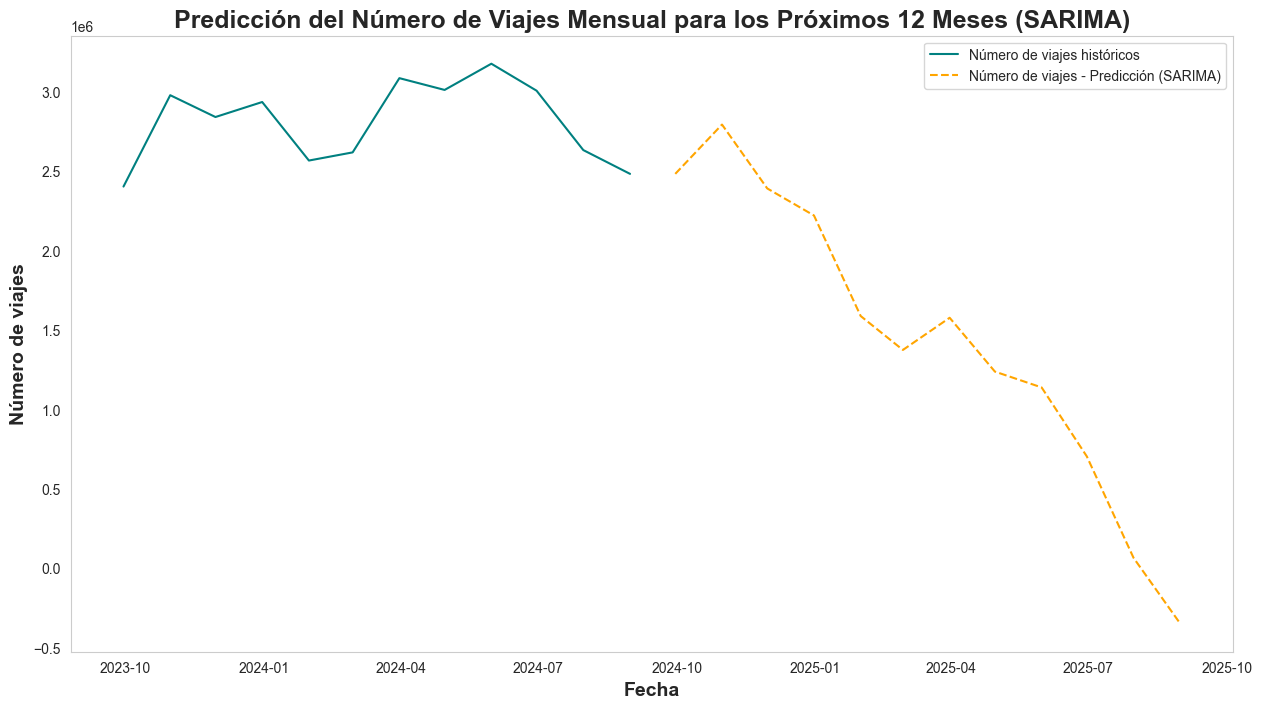

In [ ]:
# Graficar resultados
plt.figure(figsize=(15, 8))
plt.plot(mensual.index, mensual['n_trips'], label='Número de viajes históricos', color='teal')
plt.plot(forecast_df.index, forecast_df['n_trips'], label='Número de viajes - Predicción (SARIMA)', color='orange', linestyle='--')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Número de viajes', fontsize=14, fontweight='bold')
plt.title('Predicción del Número de Viajes Mensual para los Próximos 12 Meses (SARIMA)', fontsize=18, fontweight='bold')
plt.legend()
plt.grid()
plt.show()

## Multi Step

### Recursivo

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg

## Prophet

In [5]:
from prophet import Prophet

In [6]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips,fecha_numeros
pickup_datetime,,,,,,
2023-09-30,2732993,3840800.70,45795129.41,2.875794e+07,2403633.0,738793
2023-10-31,3898868,5472308.86,63778214.48,3.970597e+07,2978961.0,738824
2023-11-30,3726416,5136505.72,60388236.66,3.754072e+07,2841540.0,738854
2023-12-31,3890520,5266948.52,61323166.56,3.819132e+07,2936035.0,738885
2024-01-31,3310266,4670785.61,51801929.35,3.013794e+07,2567477.0,738916
2024-02-29,3341622,4790656.33,53447385.19,3.177544e+07,2618823.0,738945
2024-03-31,3916080,5804068.48,63395507.19,3.847457e+07,3086307.0,738976
2024-04-30,3809875,5778995.02,62516945.41,3.832527e+07,3012148.0,739006
2024-05-31,3988977,5993937.36,66836199.45,4.142039e+07,3177197.5,739037


In [7]:
mensual_p = mensual['n_trips']

In [10]:
mensual_p

,n_trips
pickup_datetime,
2023-09-30,2403633.0
2023-10-31,2978961.0
2023-11-30,2841540.0
2023-12-31,2936035.0
2024-01-31,2567477.0
2024-02-29,2618823.0
2024-03-31,3086307.0
2024-04-30,3012148.0
2024-05-31,3177197.5


In [14]:
mensual_p = mensual_p.reset_index()

In [16]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2023-09-30,2403633.0
1,2023-10-31,2978961.0
2,2023-11-30,2841540.0
3,2023-12-31,2936035.0
4,2024-01-31,2567477.0
5,2024-02-29,2618823.0
6,2024-03-31,3086307.0
7,2024-04-30,3012148.0
8,2024-05-31,3177197.5
9,2024-06-30,3007364.0


In [19]:
# Instanciamos un modelo de Prophet

prophet = Prophet(yearly_seasonality= True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. En este caso, 4 años.
build_forecast = prophet.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast = prophet.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/0hlr6mqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3k5_54x0/xo6n8k01.json
06:53:56 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=50820', 'data', 'file=/tmp/tmp3k5_54x0/0hlr6mqa.json', 'init=/tmp/tmp3k5_54x0/xo6n8k01.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model6o3nalm1/prophet_model-20241113065357_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=50820', 'data', 'file=/tmp/tmp3k5_54x0/0hlr6mqa.json', 'init=/tmp/tmp3k5_54x0/xo6n8k01.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model6o3nalm1/prophet_model-20241113065357_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

06:53:57 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=50820', 'data', 'file=/tmp/tmp3k5_54x0/0hlr6mqa.json', 'init=/tmp/tmp3k5_54x0/xo6n8k01.json', 'output', 'file=/tmp/tmp3k5_54x0/prophet_model6o3nalm1/prophet_model-20241113065357_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3k5_54x0/prophet_model6o3nalm1/prophet_model-20241113065357_1.csv
 console_msgs (if any):
	/tmp/tmp3k5_54x0/prophet_model6o3nalm1/prophet_model-20241113065357_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-30,6.641326e+06,1.649626e+06,3.784907e+06,2.102840e+06,1.084970e+07,-3.814708e+06,-8.637593e+06,1.295898e+06,-3.814708e+06,-8.637593e+06,1.295898e+06,0.0,0.0,0.0,2.826617e+06
1,2023-10-31,5.902125e+06,1.592338e+06,4.365997e+06,2.169345e+06,9.535703e+06,-2.901234e+06,-6.944706e+06,7.320411e+05,-2.901234e+06,-6.944706e+06,7.320411e+05,0.0,0.0,0.0,3.000891e+06
2,2023-11-30,5.187701e+06,1.691590e+06,3.413871e+06,2.138648e+06,8.228356e+06,-2.688678e+06,-5.370261e+06,2.412310e+05,-2.688678e+06,-5.370261e+06,2.412310e+05,0.0,0.0,0.0,2.499023e+06
3,2023-12-31,4.455463e+06,1.172234e+06,3.924853e+06,2.361576e+06,6.651329e+06,-1.787403e+06,-3.588648e+06,1.928665e+05,-1.787403e+06,-3.588648e+06,1.928665e+05,0.0,0.0,0.0,2.668060e+06
4,2024-01-31,3.724082e+06,1.698374e+06,4.056725e+06,2.740292e+06,4.797388e+06,-1.062016e+06,-2.159872e+06,6.046149e+05,-1.062016e+06,-2.159872e+06,6.046149e+05,0.0,0.0,0.0,2.662066e+06
5,2024-02-29,3.042013e+06,1.149263e+06,3.143527e+06,2.381348e+06,3.477549e+06,-5.175046e+05,-1.057533e+06,5.426279e+05,-5.175046e+05,-1.057533e+06,5.426279e+05,0.0,0.0,0.0,2.524509e+06
6,2024-03-31,2.312516e+06,1.519504e+06,4.888138e+06,1.844090e+06,2.934370e+06,1.006485e+06,1.372364e+05,1.705853e+06,1.006485e+06,1.372364e+05,1.705853e+06,0.0,0.0,0.0,3.319002e+06
7,2024-04-30,1.604074e+06,2.382593e+06,4.204655e+06,4.843123e+05,2.522294e+06,1.577217e+06,6.249439e+05,2.640701e+06,1.577217e+06,6.249439e+05,2.640701e+06,0.0,0.0,0.0,3.181291e+06
8,2024-05-31,8.734416e+05,2.933025e+06,4.166396e+06,-1.504597e+06,2.675809e+06,2.711593e+06,1.045878e+06,4.015792e+06,2.711593e+06,1.045878e+06,4.015792e+06,0.0,0.0,0.0,3.585035e+06
9,2024-06-30,1.542143e+05,1.275779e+06,3.292409e+06,-2.916408e+06,2.741476e+06,2.978240e+06,4.723345e+05,5.232375e+06,2.978240e+06,4.723345e+05,5.232375e+06,0.0,0.0,0.0,3.132455e+06


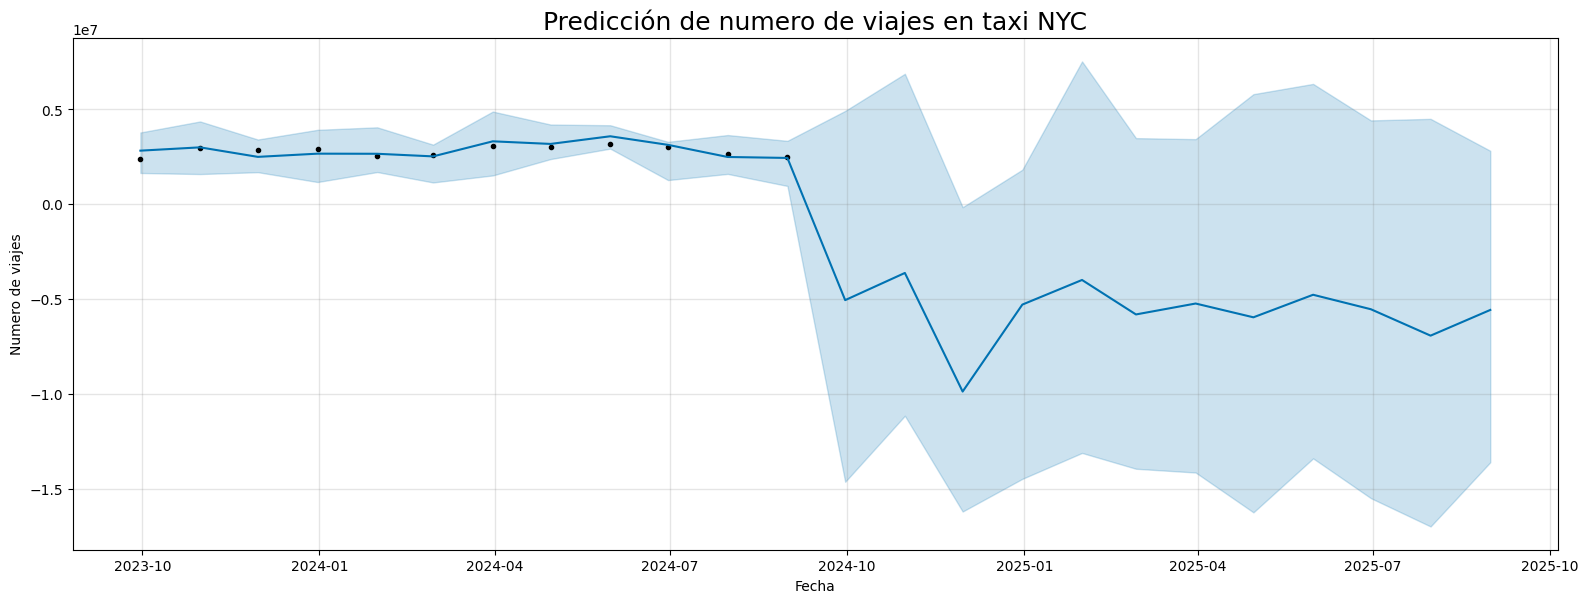

In [21]:
# plot forecasts

prophet.plot(forecast, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

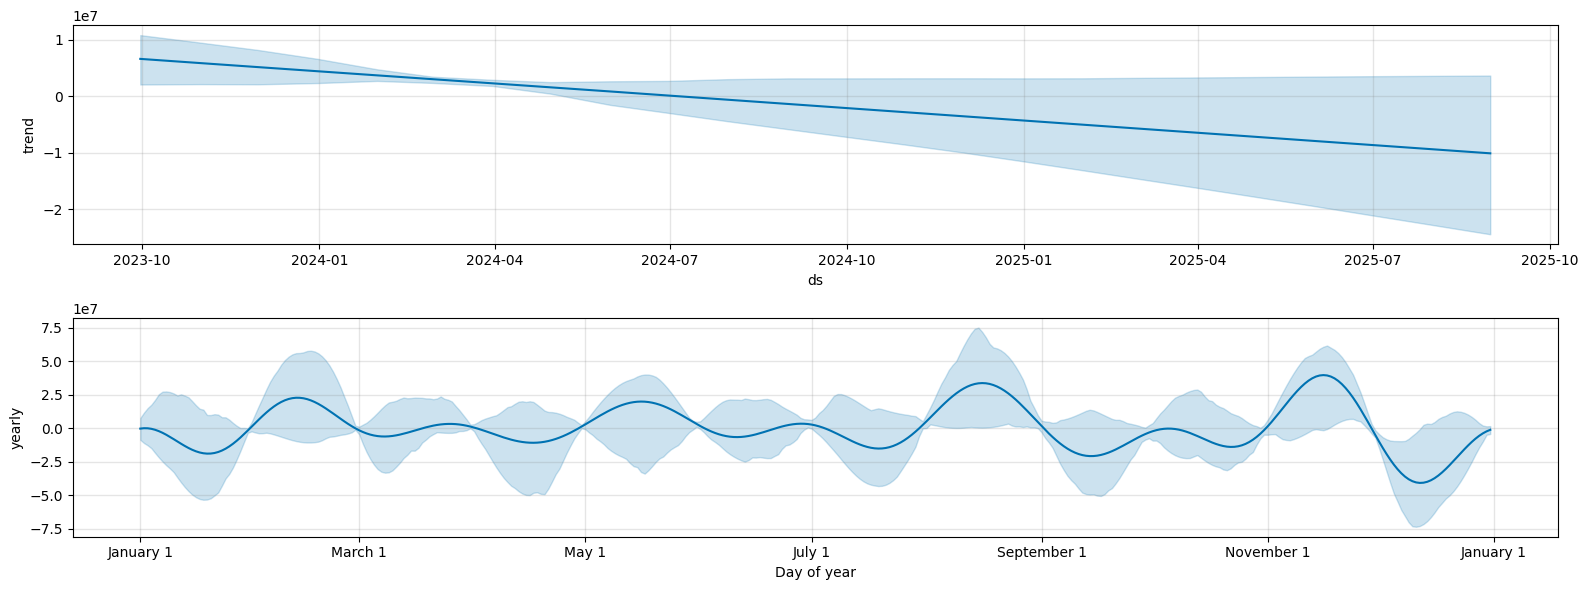

In [22]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet.plot_components(forecast, figsize=(16,6))